In [13]:
import skfuzzy.cluster as fuzz
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Importar o conjunto de dados
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data"
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test"

cols = ["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", "SHORT-LINE-DENSITY-5", "SHORT-LINE-DENSITY-2", "VEDGE-MEAN", "VEDGE-SD", "HEDGE-MEAN", "HEDGE-SD", "INTENSITY-MEAN","RAWRED-MEAN","RAWBLUE-MEAN","RAWGREEN-MEAN","EXRED-MEAN","EXBLUE-MEAN","EXGREEN-MEAN","VALUE-MEAN","SATURATION-MEAN","HUE-MEAN"]

df1 = pd.read_csv(url1, header=2, names=cols)
df2 = pd.read_csv(url2, header=2, names=cols)
df3 = pd.concat([df1, df2]).drop(["REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT"], axis=1)
best_Us = []

In [6]:
df1 = df3.iloc[:,4:9] 
df2 = df3.iloc[:,10:19]
df3 = df3.iloc[:,4:19]

In [7]:
X = df3.iloc[:, :-1].to_numpy(dtype=np.float32) #substituir df3 por dfs
y = df3.iloc[:, -1].to_numpy()
X = (X - X.mean(axis=0)) / X.std(axis=0)

O objetivo da padronização é colocar os dados em uma escala com média zero e desvio padrão igual a um, o que pode ser benéfico para muitos algoritmos de aprendizado de máquina. Isso garante que os recursos tenham uma influência comparável no modelo, evitando que recursos com valores maiores dominem aqueles com valores menores. Além disso, a padronização ajuda a lidar com diferenças de escala entre os recursos.

Portanto, esse trecho de código realiza o pré-processamento dos dados, convertendo-os em arrays NumPy e aplicando a padronização Z-score nos recursos.

In [36]:
#Para m=2
n_clusters = 7

for dfs in range(3): #Aqui selecionamos os 3 datasets
    best_obj_func = np.inf 
    best_U = None # Melhor resultado
    for i in range(50):
        cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
        if jm.mean() < best_obj_func:
            best_obj_func = jm.mean()
            best_U = u
    best_Us.append(best_U) #best_Us contém todas as melhores matrizes de partição fuzzy obtidas no algoritmo FCM

best_jm = np.inf

cntr, u, _, _, jm, _, _ = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=1000, metric='cityblock')
if jm.mean() < best_jm:
    best_jm = jm.mean()
    best_U = u
print("Melhor resultado de acordo com a Função objetivo:", best_jm)

Melhor resultado de acordo com a Função objetivo: 13424.922897961931


É implementado o algoritmo Fuzzy C-Means (FCM) com uma distância city-block personalizada para particionar um conjunto de dados em um número específico de clusters (7). 

Definição dos parâmetros:

m = 2: É o parâmetro de ponderação que controla o grau de fuzzificação. Valores maiores de m levam a partições mais difusas.

n_clusters = 7: É o número desejado de clusters para particionar os dados.

Inicialização dos melhores resultados:

best_obj_func = np.inf: É uma variável que armazena a melhor função objetivo (juntamente com a menor distância) encontrada durante o processo de otimização.

best_U = None: É uma variável que armazena a melhor matriz de pertinência fuzzy (U) encontrada durante o processo de otimização.

best_Us = []: É uma lista que armazena todas as melhores matrizes de pertinência fuzzy obtidas ao longo do algoritmo FCM.

Laço externo para seleção dos três datasets:

for dfs in range(3): Itera três vezes para selecionar três conjuntos de dados diferentes.
Laço interno para execução do algoritmo FCM:

for i in range(50): Itera 50 vezes para executar o algoritmo FCM com diferentes inicializações.
Execução do algoritmo FCM:

cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock'): Nesta linha, o algoritmo FCM é executado usando o conjunto de dados X.T (transposto) com os seguintes parâmetros:
data=X.T: Os dados de entrada para o algoritmo FCM. Eles devem ser fornecidos como uma matriz de formato (n_features, n_samples).
c=n_clusters: O número de clusters desejado.
m=2: O parâmetro de fuzzificação.
error=1e-3: O critério de parada baseado no erro máximo permitido entre duas iterações consecutivas.
maxiter=100: O número máximo de iterações permitidas para o algoritmo.
metric='cityblock': A métrica de distância usada para calcular a dissimilaridade entre os dados.

Atualização dos melhores resultados:

if jm.mean() < best_obj_func: Verifica se a função objetivo (jm.mean()) obtida é menor que a melhor função objetivo encontrada até o momento (best_obj_func).

best_obj_func = jm.mean(): Atualiza a melhor função objetivo encontrada (best_obj_func) com o valor da função objetivo atual (jm.mean()).

best_U = u: Atualiza a melhor matriz de pertinência fuzzy (best_U) com a matriz de pertinência fuzzy atual (u).

Armazenamento das melhores matrizes de pertinência fuzzy:

best_Us.append(best_U)

In [37]:
#Para m = 1.6
best_jm = np.inf
cntr, u, _, _, jm, _, _ = fuzz.cmeans(data=X.T, c=n_clusters, m=1.6, error=1e-3, maxiter=100, metric='cityblock')
if jm.mean() < best_jm:
    best_jm = jm.mean()
    best_U = u
print("Melhor resultado de acordo com a Função objetivo:", best_jm)

Melhor resultado de acordo com a Função objetivo: 22497.2944698123


In [38]:
#Para m = 1.1
best_jm = np.inf
cntr, u, _, _, jm, _, _ = fuzz.cmeans(data=X.T, c=n_clusters, m=1.1, error=1e-3, maxiter=100, metric='cityblock')
if jm.mean() < best_jm:
    best_jm = jm.mean()
    best_U = u
print("Melhor resultado de acordo com a Função objetivo:", best_jm)

Melhor resultado de acordo com a Função objetivo: 37077.464651555376


In [10]:
#MODIFIED PARTITION COEFFICIENT #revisar em virtude do resultado!

#Para df1
cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=df1.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
FE = -np.sum(u*np.log(u))
PE = -np.sum(u.mean(axis=1)*np.log(u.mean(axis=1)))
PC = (FE - PE) / np.log(n_clusters)
print(f"Modified Partition Coefficient (df1): {PC} Partition entropy (df1): {PE} ")

#Para df2
cntr, u, _, _, _, _, _ = fuzz.cmeans(data=df2.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
FE = -np.sum(u*np.log(u))
PE = -np.sum(u.mean(axis=1)*np.log(u.mean(axis=1)))
PC = (FE - PE) / np.log(n_clusters)
print(f"Modified Partition Coefficient (df2): {PC} Partition entropy (df2): {PE} ")

#Para df3
cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
FE = -np.sum(u*np.log(u))
PE = -np.sum(u.mean(axis=1)*np.log(u.mean(axis=1)))
PC = (FE - PE) / np.log(n_clusters)
print(f"Modified Partition Coefficient (df3): {PC} Partition entropy (df3): {PE} ")


Modified Partition Coefficient (df1): 611.7202849594473 Partition entropy (df1): 1.4762013745585374 
Modified Partition Coefficient (df2): 783.3604524365124 Partition entropy (df2): 1.858293864957897 
Modified Partition Coefficient (df3): 1092.5986166163148 Partition entropy (df3): 1.8724482691869717 


É calculado o Coeficiente de Partição Modificado (Modified Partition Coefficient) e a Entropia de Partição (Partition Entropy) para três diferentes conjuntos de dados (df1, df2 e df3). 

Cálculo do Coeficiente de Partição Modificado e da Entropia de Partição para df1:

cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(data=df1.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock'): O algoritmo FCM é executado para o conjunto de dados df1, produzindo a matriz de pertinência fuzzy u.

FE = -np.sum(u*np.log(u)): Calcula a Entropia Fuzzy (Fuzzy Entropy) para a matriz de pertinência u. A Entropia Fuzzy é uma medida da difusão dos membros de cada cluster. Quanto maior a entropia, mais difusa é a partição.

PE = -np.sum(u.mean(axis=1)*np.log(u.mean(axis=1))): Calcula a Entropia de Partição (Partition Entropy) para a matriz de pertinência u. A Entropia de Partição é uma medida da incerteza associada à distribuição dos membros entre os clusters.

PC = (FE - PE) / np.log(n_clusters): Calcula o Coeficiente de Partição Modificado (Modified Partition Coefficient) usando a diferença entre a Entropia Fuzzy e a Entropia de Partição normalizada pelo logaritmo do número de clusters. O Coeficiente de Partição Modificado varia de -1 a 1, onde valores mais próximos de 1 indicam partições mais nítidas e valores mais próximos de -1 indicam partições mais difusas.



In [40]:
# Definir o número de clusters
n_clusters = 7

# Fuzzy c-means para cada dataset
cntr1, u1, _, _, _, _, _ = fuzz.cmeans(data=df1.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
cntr2, u2, _, _, _, _, _ = fuzz.cmeans(data=df2.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')
cntr3, u3, _, _, _, _, _ = fuzz.cmeans(data=X.T, c=n_clusters, m=2, error=1e-3, maxiter=100, metric='cityblock')

# Obter as partições nítidas
u1_crisp = np.argmax(u1, axis=0)
u2_crisp = np.argmax(u2, axis=0)
u3_crisp = np.argmax(u3, axis=0)

# Imprimir os resultados das partições CRISP
print("Partição nítida do conjunto de dados 1:")
print(u1_crisp)
print("Partição nítida do conjunto de dados 2:")
print(u2_crisp)
print("Partição nítida do conjunto de dados 3:")
print(u3_crisp)

Partição nítida do conjunto de dados 1:
[2 2 2 2 2 2 4 4 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 4 4 4 2 2 4 4 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 2 2 2 2 2 2 0 2 4 4 2 2 5 2
 2 2 2 5 2 2 2 2 2 3 2 2 4 2 2 2 5 5 5 4 5 5 5 5 5 5 4 5 4 5 4 2 5 5 4 2 5
 5 5 5 5 5 5 5 5 5 2 2 2 4 2 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2
 2 2 5 4 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 4 4 4 2 2
 4 2 4 4 2 2 4 4 4 2 4 4 4 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 4 4 4 2 2 2
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 4 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5
 5 5 5 4 5 5 4 4 4 5 5 5 4 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5

In [41]:
unique, counts = np.unique(u1_crisp, return_counts=True)

dict(zip(unique, counts))

{0: 3, 1: 6, 2: 830, 3: 11, 4: 611, 5: 522, 6: 327}

O código acima utiliza o algoritmo Fuzzy c-means para realizar a clusterização de três conjuntos de dados diferentes. 

Definir o número de clusters: A variável n_clusters define o número desejado de clusters ou grupos que serão criados a partir dos dados.

Fuzzy c-means para cada dataset: O algoritmo Fuzzy c-means é aplicado a cada conjunto de dados usando a função fuzz.cmeans. Neste caso, o primeiro conjunto terce df2 de dados do conjunto df1 X. O segundo conjunto é parâ, ometro data especifica os dados de entrada para o algoritmo, c define o número de clusters, m é um parâmetro que controla o grau de fuzzificação (usualmente definido como 2), error é o critério de erro para parar o algoritmo, maxiter define o número máximo de iterações e metric especifica a métrica de distância usada para calcular a similaridade entre os pontos.

Obter as partições nítidas: A variável u1 armazena as partições fuzzy resultantes do primeiro conjunto de dados, onde cada coluna representa a pertinência de cada ponto a cada cluster. A função np.argmax é usada para obter as partições nítidas, ou seja, atribuir cada ponto ao cluster com maior pertinência. As partições nítidas são armazenadas nas variáveis u1_crisp, u2_crisp e u3_crisp.

Imprimir os resultados das partições CRISP: Por fim, os resultados das partições nítidas são impressos na tela usando a função print. Cada conjunto de dados tem sua respectiva partição nítida exibida.

A clusterização fuzzy permite que cada ponto pertença parcialmente a mais de um cluster, refletindo a incerteza na atribuição de clusters. No entanto, ao obter as partições nítidas, cada ponto é atribuído exclusivamente a um único cluster, simplificando a interpretação dos resultados.

In [42]:
# ÍNDICE DE RAND AJUSTADO
# Converter partição fuzzy para crisp
from sklearn.metrics import adjusted_rand_score

labels1 = np.argmax(u1, axis=0)
labels2 = np.argmax(u2, axis=0)
labels3 = np.argmax(u3, axis=0)

y1 = df1.iloc[:, -1].to_numpy()
y2 = df2.iloc[:, -1].to_numpy()
y3 = df3.iloc[:, -1].to_numpy()


ari1 = adjusted_rand_score(y1, labels1)
ari2 = adjusted_rand_score(y2, labels2)
ari3 = adjusted_rand_score(y3, labels3)

# Print results
print("Adjusted Rand Index for dataset 1:", ari1)
print("Adjusted Rand Index for dataset 2:", ari2)
print("Adjusted Rand Index for dataset 3:", ari3)

Adjusted Rand Index for dataset 1: 0.02931265244977159
Adjusted Rand Index for dataset 2: 0.01437980247916568
Adjusted Rand Index for dataset 3: 0.014155398710015086


O Índice Rand Ajustado (Adjusted Rand Index - ARI) serve para avaliar a qualidade das partições nítidas obtidas anteriormente. Vou explicar cada parte do código:

Importar a métrica ARI: A linha from sklearn.metrics import adjusted_rand_score importa a função adjusted_rand_score do módulo sklearn.metrics. Essa função será usada para calcular o ARI.

Obter as etiquetas nítidas: As variáveis labels1, labels2 e labels3 armazenam as partições nítidas obtidas anteriormente através da função np.argmax, seguindo o mesmo procedimento mencionado anteriormente.

Obter os rótulos verdadeiros: As variáveis y1, y2 e y3 são obtidas a partir dos respectivos conjuntos de dados originais. Esses rótulos verdadeiros serão usados como referência para calcular o ARI.

Calcular o ARI: O ARI é calculado para cada conjunto de dados usando a função adjusted_rand_score. Essa função compara as partições nítidas com os rótulos verdadeiros e retorna um valor entre -1 e 1, onde um valor próximo de 1 indica uma concordância forte entre as partições e os rótulos verdadeiros.

Imprimir os resultados: Os valores do ARI são impressos na tela usando a função print. Cada conjunto de dados tem seu respectivo ARI exibido.

O Índice Rand Ajustado é uma métrica comumente utilizada para avaliar a qualidade de algoritmos de clusterização. Ele mede a similaridade entre duas partições, levando em consideração todas as concordâncias e discordâncias entre os pontos e seus rótulos verdadeiros. Quanto mais próximo de 1 for o valor do ARI, melhor é a qualidade da clusterização.

In [43]:
labels = np.argmax(u, axis=0)
true_labels = np.array([int(i)-1 for i in y]) # Convert y to 0-based labels
# Compute confusion matrix
cm = confusion_matrix(true_labels, labels)
print(cm)

[[  0   0   0   0   0   0   1   1   0   0   0]
 [  0   0   0   0 322 204   0 380 142 188 147]
 [  0   0   0   0  85 200   0 108   0   0  67]
 [  0   0   0   0   0   1   0 137   0   0   0]
 [  0   0   0   0   0   0  52   0   0   0   0]
 [  0   0   0   0   0   0 275   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]


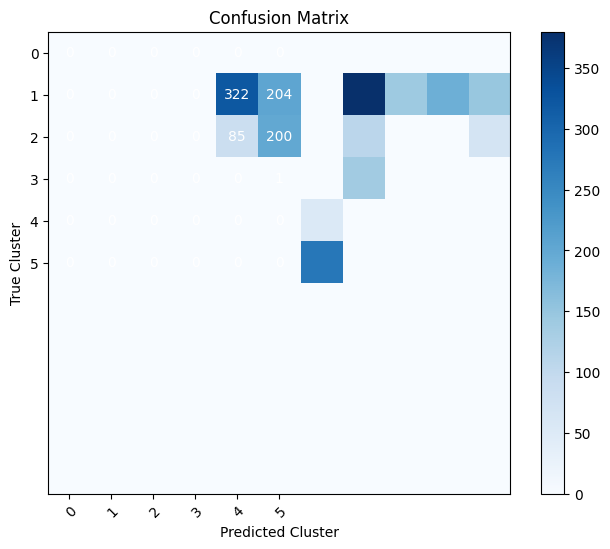

In [44]:
import matplotlib.pyplot as plt
import numpy as np


# Get the number of unique classes
num_classes = len(np.unique(true_labels))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels
ax.set(xticks=np.arange(num_classes),
       yticks=np.arange(num_classes),
       xticklabels=np.arange(num_classes),
       yticklabels=np.arange(num_classes),
       xlabel='Predicted Cluster',
       ylabel='True Cluster')

# Rotate the x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(num_classes):
    for j in range(num_classes):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="white")

# Set the title
ax.set_title("Confusion Matrix")

# Display the plot
plt.show()


O código calcula a matriz de confusão (confusion matrix) com base nas partições nítidas obtidas anteriormente. Vou explicar cada parte do código:

Obter as etiquetas nítidas: A variável labels é obtida através da função np.argmax, seguindo o mesmo procedimento mencionado anteriormente. Ela armazena as partições nítidas resultantes.

Converter os rótulos verdadeiros: A variável true_labels é criada para armazenar os rótulos verdadeiros convertidos em uma forma adequada para cálculo da matriz de confusão. No código fornecido, há uma linha para converter os rótulos y para uma forma de rótulos baseados em 0. É assumido que os rótulos originais estão em uma forma numérica, começando em 1. O código realiza a conversão subtraindo nulo, para obter de cada uma representação rót 0-based.

Calcular a matriz de confusão: A matriz de confusão é calculada usando a função confusion_matrix de alguma biblioteca que não está especificada no código fornec matriz de conf tabela que mostra ausão frequência de é uma classificaçõesido. A corretas e incorretas feitas pelo modelo. Ela é calcul de clusterizaçãoada comparando as partições nítidas com os rótulos verdadeiros.

Armazenar a matriz de confusão: A matriz de confusão é armazenada na variável cm.

A matriz de confusão é uma ferramenta útil para avaliar o desempenho de algoritmos de clusterização. Ela fornece informações sobre as classificações corretas e incorretas feitas pelo modelo. Cada célula da matriz representa o número de instâncias que foram classificadas em determinada combinação de rótulo verdadeiro e rótulo predito. É possível calcular várias métricas adicionais a partir da matriz de confusão, como a acurácia, a precisão, o recall e a medida F1.

In [45]:
def fmeasure(cm):
    l = len(cm)
    s = cm.sum()
    s_true = cm.sum(axis = 1)
    s_predict = cm.sum(axis = 0)
    f_score = np.zeros((l, l))
    for i in range(dfs):
        for j in range(7):
            f_score[i, j] = (2*cm[i, j])/(s_true[i]+s_predict[j])

    return ((f_score.max(axis =1)*s_true).sum())/s

fmeasure(cm)

0.21540392681073228

A F-measure é uma métrica utilizada para avaliar a precisão de um modelo de classificação, levando em consideração tanto a precisão (ou taxa de verdadeiros positivos) quanto a taxa de recall (ou taxa de positivos reais).

A função fmeasure(cm) recebe a matriz de confusão como entrada. A matriz de confusão é uma tabela que mostra a contagem dos resultados de classificação corretos e incorretos produzidos por um classificador. Ela é geralmente usada para avaliar o desempenho de um algoritmo de aprendizado supervisionado.

A primeira linha do código define a função fmeasure com um parâmetro cm, que representa a matriz de confusão.

A segunda linha do código calcula o tamanho da matriz de confusão, que representa o número de classes ou categorias que estão sendo classificadas. A variável l recebe o valor do comprimento da matriz de confusão.

A terceira linha do código calcula a soma de todos os elementos da matriz de confusão e atribui o valor à variável s.

A quarta linha do código calcula a soma dos elementos em cada linha da matriz de confusão e atribui o resultado à variável s_true. Essa soma representa o total de exemplos reais em cada classe.

A quinta linha do código calcula a soma dos elementos em cada coluna da matriz de confusão e atribui o resultado à variável s_predict. Essa soma representa o total de exemplos previstos em cada classe.

A sexta linha do código cria uma matriz de zeros chamada f_score com dimensões (l, l), onde l é o número de classes. Essa matriz será usada para armazenar os valores da pontuação F-measure para cada par de classe verdadeira e prevista.

A partir da sétima linha, um loop é executado para calcular a pontuação F-measure para cada par de classe verdade e j,iracorre onde i representa os índices i e prevista a classe. O loop per a classe prevista.

verdadeira e j representaDentro do loop, a fórmula da pontuação F-measure é aplicada. A pontuação F-measure é calculada como o dobro da razão entre os elementos correspondentes da matriz de confusão e a soma das linhas verdadeiras (s_true[i]) mais a soma das colunas previstas (s_predict[j]).

A pontuação F-measure resultante é armazenada na matriz f_score na posição correspondente (i, j).

Após o loop, a última linha do código calcula o máximo valor de pontuação F-measure para cada classe verdadeira (usando f_score.max(axis=1)), multiplica-o pelo número total de exemplos verdadeiros (s_true) e, em seguida, divide pelo total de exemplos (s). Isso resulta no cálculo final da pontuação F-measure.

No final, o resultado da pontuação F-measure é retornado pela função fmeasure(cm).







In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import f1_score


# Generate 7 random partitions using KMeans
n_clusters = 7
partitions = []
for i in range(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=i)
    labels = kmeans.fit_predict(X)
    partitions.append(labels)

# Compute ARI and F-measure for all pairs of partitions
for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        ari = adjusted_rand_score(partitions[i], partitions[j])
        fmeasure = f1_score(partitions[i], partitions[j], average='weighted')
        print(f"Índice de Rand entre partições {i+1} e {j+1}: {ari:.3f}")
        print(f"F-measure entre partições {i+1} e {j+1}: {fmeasure:.3f}")


Índice de Rand entre partições 1 e 2: 0.995
F-measure entre partições 1 e 2: 0.233
Índice de Rand entre partições 1 e 3: 1.000
F-measure entre partições 1 e 3: 0.000
Índice de Rand entre partições 1 e 4: 1.000
F-measure entre partições 1 e 4: 0.000
Índice de Rand entre partições 1 e 5: 0.925
F-measure entre partições 1 e 5: 0.244
Índice de Rand entre partições 1 e 6: 0.995
F-measure entre partições 1 e 6: 0.002
Índice de Rand entre partições 1 e 7: 1.000
F-measure entre partições 1 e 7: 0.185
Índice de Rand entre partições 2 e 3: 0.995
F-measure entre partições 2 e 3: 0.322
Índice de Rand entre partições 2 e 4: 0.995
F-measure entre partições 2 e 4: 0.144
Índice de Rand entre partições 2 e 5: 0.929
F-measure entre partições 2 e 5: 0.438
Índice de Rand entre partições 2 e 6: 1.000
F-measure entre partições 2 e 6: 0.000
Índice de Rand entre partições 2 e 7: 0.995
F-measure entre partições 2 e 7: 0.000
Índice de Rand entre partições 3 e 4: 1.000
F-measure entre partições 3 e 4: 0.332
Índi

O código apresentado realiza a avaliação de partições geradas por um algoritmo de clusterização (KMeans) utilizando métricas como o Índice de Rand Ajustado (ARI) e a F-measure.

Na primeira parte do código, é importado o KMeans do módulo sklearn.cluster e as métricas adjusted_rand_score e f1_score do módulo sklearn.metrics.

A variável n_clusters é definida como 7, indicando o número de partições que serão geradas. Em seguida, é criada uma lista chamada partitions que irá armazenar as partições geradas.

Dentro do loop for, que itera de 0 a 6 (pois n_clusters é igual a 7), é criado um objeto KMeans com o número de clusters igual a 7 e o estado aleatório definido pelo valor de i. A função fit_predict é então aplicada ao conjunto de dados X (que não está presente no código fornecido, mas deve ser definido anteriormente). Essa função retorna as etiquetas (labels) que indicam a qual cluster cada ponto pertence na respectiva partição. Essas etiquetas são armazenadas na lista partitions.

Em seguida, há outro loop for aninhado, que itera sobre todas as combinações únicas de pares de partições geradas. O loop começa a partir de i+1 para evitar repetições, pois a métrica ARI e F-measure são simétricas.

Dentro desse loop, o Índice de Rand Ajustado (ARI) é calculado chamando a função adjusted_rand_score e passando as partições partitions[i] e partitions[j] como argumentos. O Índice de Rand Ajustado é uma medida de similaridade entre duas partições, que compara todos os pares de amostras e conta quantos pares são classificados de forma consistente ou inconsistentemente nas duas partições. O resultado é armazenado na variável ari.

Em seguida, a F-measure é calculada chamando a função f1_score. Ela recebe as partições partitions[i] e partitions[j] como argumentos, bem como o parâmetro average definido como 'weighted'. A F-measure é uma métrica de avaliação que combina a precisão e o recall. Ela é calculada comparando as partições e medindo a similaridade entre elas. O resultado é armazenado na variável fmeasure.

Por fim, o código imprime na tela os resultados do Índice de Rand Ajustado (ARI) e da F-measure para cada par de partições.

O Índice de Rand Ajustado (ARI) é uma métrica que varia de -1 a 1, onde 1 indica uma concordância perfeita entre as partições e valores próximos a 0 ou negativos indicam uma discordância entre as partições.

A F-measure varia de 0 a 1, onde 1 indica uma alta similaridade entre as partições e valores próximos a 0 indicam pouca similaridade. O parâmetro average é definido como 'weighted', o que significa que a média ponderada da F-measure é calculada levando em consideração o número de elementos em cada classe.

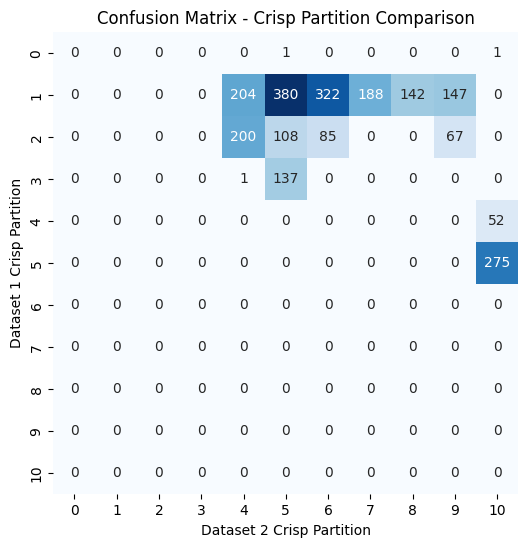

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel("Dataset 2 Crisp Partition")
plt.ylabel("Dataset 1 Crisp Partition")
plt.title("Confusion Matrix - Crisp Partition Comparison")
plt.show()


In [29]:
# Print the prototypes
print("Prototypes for dataset 1:")
print(cntr1)
print("\nPrototypes for dataset 2:")
print(cntr2)

Prototypes for dataset 1:
[[1.34019824e+00 1.13616831e+00 1.72218929e+00 5.57734169e+00
  4.33294442e+00]
 [2.40920182e+02 1.15755774e+01 2.02911060e+02 2.63768467e+01
  2.00326404e+01]
 [5.35312048e+02 2.96380915e+01 4.23405669e+02 5.49003832e+01
  4.75720831e+01]
 [6.03745753e+02 4.22939241e+01 1.34060432e+03 6.31669296e+01
  5.48953019e+01]
 [2.25875745e+00 3.28335212e+00 3.61095591e+00 5.38484538e+01
  4.79793324e+01]
 [6.89312853e-01 1.21670420e+00 1.04879497e+00 1.20079095e+02
  1.09229286e+02]
 [2.33783863e+00 2.52964591e+00 4.13822478e+00 2.25641951e+01
  1.97338041e+01]]

Prototypes for dataset 2:
[[  2.09146971  -1.93360943   5.90965952  -3.97605008   5.57841426
    0.67449993  -1.66153913]
 [ 37.90794397 -14.17696612  29.54077203 -15.36380579  52.89916887
    0.29892006  -2.06748507]
 [ 16.72703889  -7.5876825   20.5475605  -12.95987794  27.95510764
    0.43640386  -1.88344004]
 [122.86858578 -29.35247905  43.04783484 -13.6953558  141.78321907
    0.17117242  -2.31495119]
 [

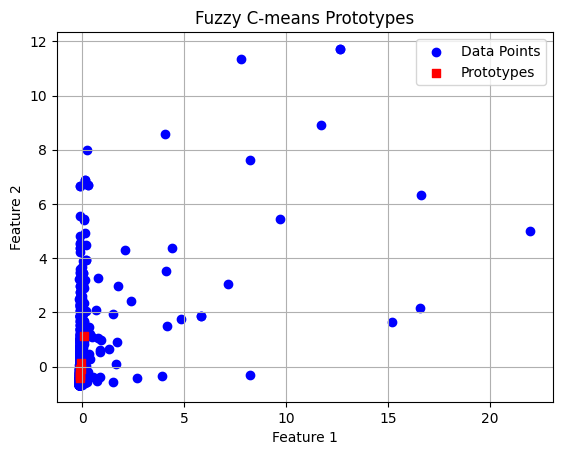

In [30]:
# Plot the prototypes
plt.scatter(X[:, 0], X[:, 1], c='b', label='Data Points')
plt.scatter(cntr[:, 0], cntr[:, 1], c='r', marker='s', label='Prototypes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fuzzy C-means Prototypes')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Obtain the crisp partition
labels = np.argmax(u, axis=0)

# Compute the confusion matrix
cm = confusion_matrix(y, labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets